In [8]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np


In [10]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv'
df = pd.read_csv(url)

In [11]:
from ucimlrepo import fetch_ucirepo

forest_fires = fetch_ucirepo(id=162)
X = forest_fires.data.features
y = forest_fires.data.targets
print(forest_fires.metadata)

{'uci_id': 162, 'name': 'Forest Fires', 'repository_url': 'https://archive.ics.uci.edu/dataset/162/forest+fires', 'data_url': 'https://archive.ics.uci.edu/static/public/162/data.csv', 'abstract': 'This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data (see details at: http://www.dsi.uminho.pt/~pcortez/forestfires).', 'area': 'Climate and Environment', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 517, 'num_features': 12, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['area'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2007, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5D88D', 'creators': ['Paulo Cortez', 'Anbal Morais'], 'intro_paper': {'ID': 368, 'type': 'NATIVE', 'title': 'A data mining approach to predict forest fires using meteorological da

In [12]:
print(df.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [13]:
# X – x-axis spatial coordinate within the Montesinho park map (integer: 1 to 9).

# Y – y-axis spatial coordinate within the Montesinho park map (integer: 2 to 9).

# month – month of the year (categorical: 'jan' to 'dec').

# day – day of the week (categorical: 'mon' to 'sun').

# FFMC – Fine Fuel Moisture Code from the FWI system (numeric: 18.7 to 96.20). Represents the moisture of surface litter and fine fuels.

# DMC – Duff Moisture Code (numeric: 1.1 to 291.3). Represents moisture in loosely compacted organic layers of moderate depth.

# DC – Drought Code (numeric: 7.9 to 860.6). Represents long-term drought effects on deep organic layers.

# ISI – Initial Spread Index (numeric: 0.0 to 56.10). Indicates the rate of fire spread.

# temp – Temperature in Celsius (numeric: 2.2 to 33.30).

# RH – Relative Humidity in % (numeric: 15 to 100).

# wind – Wind speed in km/h (numeric: 0.40 to 9.40).

# rain – Rainfall in mm/m² (numeric: 0.0 to 6.4).

# area – The burned area of the forest (numeric: 0.00 to 1090.84 hectares). Note: the distribution is highly skewed; many zeros represent no fires.

In [14]:
print(df.count())

X        517
Y        517
month    517
day      517
FFMC     517
DMC      517
DC       517
ISI      517
temp     517
RH       517
wind     517
rain     517
area     517
dtype: int64


In [15]:
print(df.dtypes)

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object


In [16]:
# Change categorical columns to numeric

df.columns = df.columns.str.strip().str.lower()

month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

df['month'] = df['month'].map(month_map)


day_map = {
    'mon': 1,
    'tue': 2,
    'wed': 3,
    'thu': 4,
    'fri': 5,
    'sat': 6,
    'sun': 7
}

df['day'] = df['day'].map(day_map)



In [17]:
# Drop columns X and Y

df = df.drop(['x', 'y'], axis=1)

In [18]:
# Rename columns

df = df.rename(columns={
    'ffmc': 'Fine_Fuel_Moisture_Code',
    'dmc': 'Duff_Moisture_Code',
    'dc': 'Drought_Code',
    'isi': 'Initial_Spread_Index',
    'temp': 'Temperature',
    'rh': 'Humidity',
    'wind': 'WindSpeed',
    'rain': 'Rainfall',
    'area': 'BurnedArea'
})

In [19]:
print(df.head())

   month  day  Fine_Fuel_Moisture_Code  Duff_Moisture_Code  Drought_Code  \
0      3    5                     86.2                26.2          94.3   
1     10    2                     90.6                35.4         669.1   
2     10    6                     90.6                43.7         686.9   
3      3    5                     91.7                33.3          77.5   
4      3    7                     89.3                51.3         102.2   

   Initial_Spread_Index  Temperature  Humidity  WindSpeed  Rainfall  \
0                   5.1          8.2        51        6.7       0.0   
1                   6.7         18.0        33        0.9       0.0   
2                   6.7         14.6        33        1.3       0.0   
3                   9.0          8.3        97        4.0       0.2   
4                   9.6         11.4        99        1.8       0.0   

   BurnedArea  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  


In [20]:
pip install pandas numpy scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


EDA:

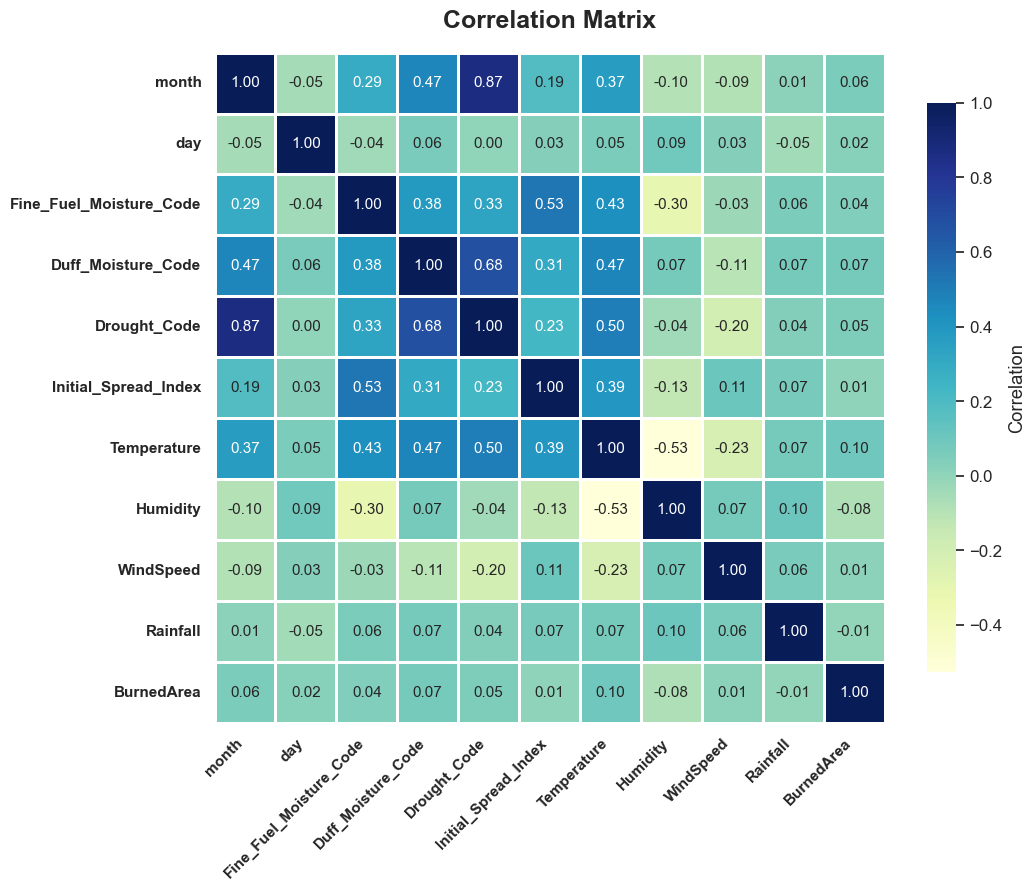

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(11, 9))
sns.set(style="white", font_scale=1.1)

ax = sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=1,
    linecolor='white',
    cbar_kws={'shrink': 0.85, 'label': 'Correlation'},
    square=True,
    annot_kws={"size": 11}
)

plt.title("Correlation Matrix", fontsize=18, pad=18, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=11, weight='bold')
plt.yticks(rotation=0, fontsize=11, weight='bold')
plt.tight_layout()
plt.show()

FEATURE SELCTION AND ENGINEERING:

In [24]:
X = df.drop('BurnedArea', axis=1)  # BurnedArea is your target variable
y = df['BurnedArea']

SPLIT THE DATA:

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

INITIAL MODEL DEVELOPMENT:

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

model = RandomForestRegressor(n_estimators=100, random_state=42)
# Ensure categorical columns are encoded before fitting the model

# Copy X_train and X_test to avoid modifying originals
X_train_enc = X_train.copy()
X_test_enc = X_test.copy()

# Encode 'day' column if present
if 'day' in X_train_enc.columns:
    le_day = LabelEncoder()
    X_train_enc['day'] = le_day.fit_transform(X_train_enc['day'])
    X_test_enc['day'] = le_day.transform(X_test_enc['day'])

# Fit the model
model.fit(X_train_enc, y_train)

# Predictions
y_pred = model.predict(X_test_enc)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 11839.98
R^2 Score: -0.00


RESULTS AND ITERATION:


C:\Users\User\AppData\Local\Temp\ipykernel_2816\3674337799.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


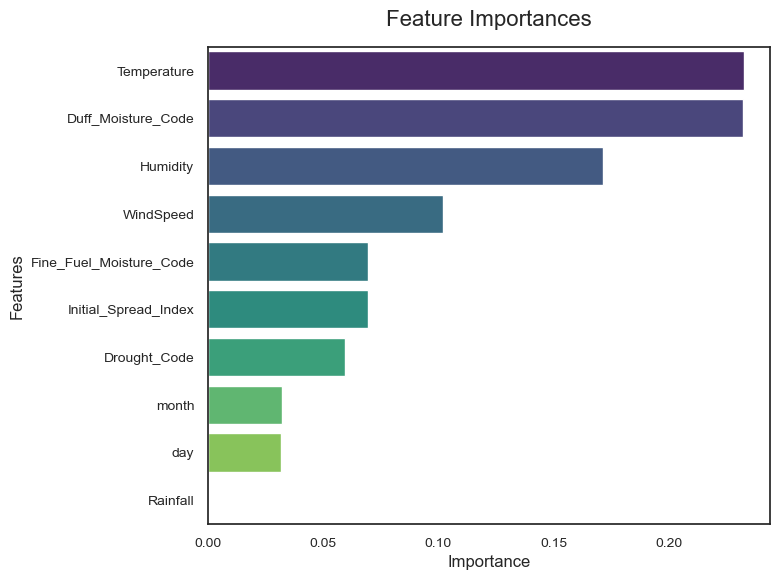

In [28]:
# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Features': X_train_enc.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(
    x='Importance',
    y='Features',
    data=importance_df,
    palette='viridis'
)
plt.title("Feature Importances", fontsize=16, pad=15)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()